In [3]:
## Trabalho Final de Classificação: SVD da Disciplina de Algebra Linear

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import glob
import numba
from sklearn.model_selection import train_test_split as division

In [5]:
### Redimensionando o tamanho das imagens de 400x400 para 40x40

In [6]:
images = glob.glob('*/*/*.png')

for file in images:
    img = Image.open(file)
    width, height = img.size
    (new_width, new_height) = (40, 40)
    img = img.resize(
        (round(new_width),
        round(new_height)),
        Image.ANTIALIAS)
    img.save(file, format='png')

In [7]:
### Dividindo as imagens em treino e teste (80% treino e 20% teste) e compondo nossa matriz de dados de treino com os dados das imagens de treino

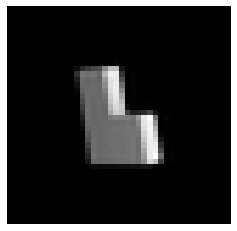

tamanho da dimensão da imagem retirando o RGB: (40, 40)


In [8]:
for file in images:
    img = Image.open(file).convert('L')
    img.save(file, format='png')

images_array = np.asarray(glob.glob('*/*/*.png'))
teste = Image.open(images_array[0])
teste = np.asarray(teste, dtype=np.float32)/255

plt.figure(figsize=(4, 4))
im = plt.imshow(teste, aspect='auto', cmap='gray')
plt.axis("off")
plt.show()
print("tamanho da dimensão da imagem retirando o RGB:", teste.shape)

In [9]:
### Dividindo as imagens em treino e teste (80% treino e 20% teste) e compondo nossa matriz de dados de treino com os dados das imagens de treino

dimensão da matriz de dados de treino: (32000, 1600)


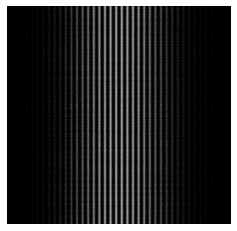

In [10]:
images_array = np.asarray(glob.glob('*/*/*.png'))
images_train, images_test = division(images_array, test_size=0.2, random_state=5)
data_matrix = Image.open(images_train[0])
data_matrix = np.asarray(data_matrix, dtype=np.float32)/255
data_matrix = np.reshape(data_matrix, (1, 1600))

for i in range(1, images_train.shape[0]):
        aux = Image.open(images_train[i])
        aux = np.asarray(aux, dtype=np.float32)/255
        aux = np.reshape(aux, (1, 1600))
        data_matrix = np.vstack((data_matrix, aux))

print("dimensão da matriz de dados de treino:", data_matrix.shape)
plt.figure(figsize=(4, 4))
im = plt.imshow(data_matrix, aspect='auto', cmap='gray')
plt.axis("off")
plt.show()

In [11]:
### Centralizando a matriz de dados original data_matrix^ obtendo a matriz data_matrix centralizada.

In [12]:
centralized_data_matrix = data_matrix - np.mean(data_matrix, axis=0)
print(centralized_data_matrix.shape)

(32000, 1600)


In [13]:
### Compondo a matriz de dados de teste

dimensão da matriz de dados de treino: (8000, 1600)


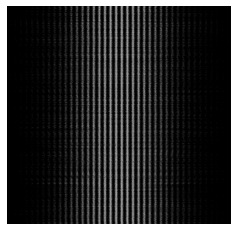

In [14]:

test_data_matrix = Image.open(images_test[0])
test_data_matrix = np.asarray(test_data_matrix, dtype=np.float32)/255
test_data_matrix = np.reshape(test_data_matrix, (1, 1600))
for i in range(1, images_test.shape[0]):
        aux = Image.open(images_test[i])
        aux = np.asarray(aux, dtype=np.float32)/255
        aux = np.reshape(aux, (1, 1600))
        test_data_matrix = np.vstack((test_data_matrix, aux))

print("dimensão da matriz de dados de treino:", test_data_matrix.shape)
plt.figure(figsize=(4, 4))
im = plt.imshow(test_data_matrix, aspect='auto', cmap='gray')
plt.axis("off")
plt.show()

In [15]:
centralized_test_data_matrix = test_data_matrix - np.mean(test_data_matrix, axis=0)
print(centralized_test_data_matrix.shape)

(8000, 1600)


In [16]:
### Tarefas

In [17]:
### Calcular, para o respectivo banco de dados, a SVD da matriz de dados centralizados X. Gerar um gráfico de número de valores singulares versus variabilidade acumulada.

In [18]:
u, s, vt = np.linalg.svd(centralized_data_matrix, full_matrices=False)
print(u.shape)
print(s.shape)
print(vt.shape)

(32000, 1600)
(1600,)
(1600, 1600)


In [19]:
### Gerando a imagem das 20 primeiras eigenlegos

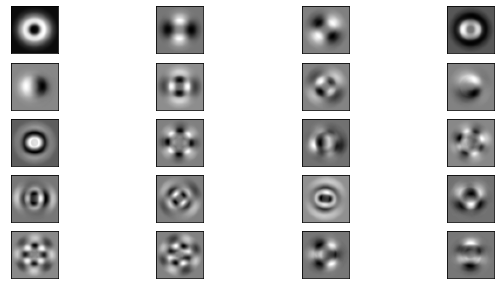

In [20]:
fig = plt.figure(figsize=(10,5))
for i in range(20):
    sub = fig.add_subplot(5, 4,i+1)
    sub.imshow(np.reshape(vt.T[:,i], (40,40)), cmap='gray')
    sub.set_xticks([])
    sub.set_yticks([])
    sub.set_xticklabels([])
    sub.set_yticklabels([])

In [21]:
### Gerando o a porcentagem de número de valores singulares versus variabilidade acumulada.

In [22]:
singular_vectors = np.array([0])
accumulated_variability = np.array([0])

for i in range(0, s.shape[0]-1, 10):
    aux = 100*((np.sum(s[0:i]**2))/(np.sum(s**2)))
    accumulated_variability = np.hstack((accumulated_variability, aux))

    singular_vectors = np.hstack((singular_vectors, i))

    print(f'Vetores singulares: {i}, Variabilidade acumulada: {aux}%')

Vetores singulares: 0, Variabilidade acumulada: 0.0%
Vetores singulares: 10, Variabilidade acumulada: 65.0256097316742%
Vetores singulares: 20, Variabilidade acumulada: 74.90190863609314%
Vetores singulares: 30, Variabilidade acumulada: 79.96043562889099%
Vetores singulares: 40, Variabilidade acumulada: 83.15578699111938%
Vetores singulares: 50, Variabilidade acumulada: 85.41575074195862%
Vetores singulares: 60, Variabilidade acumulada: 87.26168870925903%
Vetores singulares: 70, Variabilidade acumulada: 88.64064812660217%
Vetores singulares: 80, Variabilidade acumulada: 89.74955081939697%
Vetores singulares: 90, Variabilidade acumulada: 90.65633416175842%
Vetores singulares: 100, Variabilidade acumulada: 91.42311215400696%
Vetores singulares: 110, Variabilidade acumulada: 92.08598136901855%
Vetores singulares: 120, Variabilidade acumulada: 92.67059564590454%
Vetores singulares: 130, Variabilidade acumulada: 93.18594336509705%
Vetores singulares: 140, Variabilidade acumulada: 93.6532735

In [23]:
### Gerando o gráfico de número de valores singulares versus variabilidade acumulada.

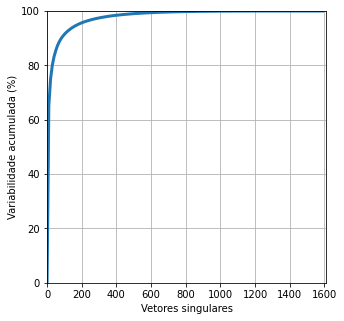

In [24]:
plt.figure(figsize=(5,5))
plt.plot(singular_vectors, accumulated_variability, lw=3.0)
plt.grid()
plt.ylabel("Variabilidade acumulada (%)")
plt.xlabel("Vetores singulares")
plt.axis([0, s.shape[0] + 10, 0, 100])
plt.show()

In [25]:
### Selecionar valores apropriados de variabilidade acumulada para reduzir a dimensionalidade do problema de classicação, resolvendo-o para o respectivo banco de dados.

In [26]:
r = 60
img_proj = vt.T[:,0:r]
projected_train_images = centralized_data_matrix@img_proj
projected_train_images.shape

(32000, 60)

In [27]:
r = 60
img_proj_test = vt.T[:,0:r]
projected_test_images = centralized_test_data_matrix@img_proj_test
projected_test_images.shape

(8000, 60)

In [28]:
#passa por todas as imagens de teste e ve o resultado encontrado
hits = 0
mistakes = 0
index= -1

@numba.jit(fastmath=True, cache=True, nopython=False, forceobj = True)
def find_match(images_test, images_train, hits, mistakes):
    hits = 0
    mistakes = 0
    index= -1
    for i in range(1, images_test.shape[0]):
        test_image = np.reshape(np.asarray(Image.open(images_test[i]),dtype=np.float32)/255,(1, 1600))
        distancia = 50000000
        for j in range(1, images_train.shape[0]):
            dist = np.linalg.norm(projected_test_images[i,:]-projected_train_images[j,:])
            if dist <= distancia:
                index = j
                distancia = dist
            name = images_train[index]
        if images_test[i][16:21] == images_train[index][16:21]:
            hits+=1
        else:
            mistakes+=1
    total = hits+mistakes
    result = [hits, mistakes, total]
    return result

In [29]:
a = find_match(images_test, images_train, hits, mistakes);
a

<ipython-input-28-abf23e2f5f46>:6: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "find_match" failed type inference due to: Unknown attribute 'open' of type Module(<module 'PIL.Image' from 'C:\\Users\\Antonio Neto\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\PIL\\Image.py'>)

File "<ipython-input-28-abf23e2f5f46>", line 12:
def find_match(images_test, images_train, hits, mistakes):
    <source elided>
    for i in range(1, images_test.shape[0]):
        test_image = np.reshape(np.asarray(Image.open(images_test[i]),dtype=np.float32)/255,(1, 1600))
        ^

During: typing of get attribute at <ipython-input-28-abf23e2f5f46> (12)

File "<ipython-input-28-abf23e2f5f46>", line 12:
def find_match(images_test, images_train, hits, mistakes):
    <source elided>
    for i in range(1, images_test.shape[0]):
        test_image = np.reshape(np.asarray(Image.open(images_test[i]),dtype=np.float32)/255,(1, 1600))
        ^

  

[5038, 2961, 7999]

In [30]:
print(a[0])
print(a[1])
print(100*(a[0]/a[2]))

5038
2961
62.98287285910739


In [31]:
#COLETOR DE DADOS PARA GERAR GRAFICOS
hit_vector = []
mistakes_vector = []
hit_rate_vector = []
accumulated_variability_vector = []

for z in range(1, 100, 10):
    r = z
    img_proj = vt.T[:,0:r]
    projected_train_images = centralized_data_matrix@img_proj

    img_proj_test = vt.T[:,0:r]
    projected_test_images = centralized_test_data_matrix@img_proj_test

    accuracy_result = find_match(images_test, images_train, hits, mistakes)
    hit_vector.append(accuracy_result[0])
    mistakes_vector.append(accuracy_result[1])
    hit_rate_vector.append(100*(accuracy_result[0]/accuracy_result[2]))
    accumulated_variability_vector.append(100*(np.sum(s[0:r]**2)/np.sum(s**2)))

for z in range(100,1000,200):
    r = z
    img_proj = vt.T[:,0:r]
    projected_train_images = centralized_data_matrix@img_proj

    img_proj_test = vt.T[:,0:r]
    projected_test_images = centralized_test_data_matrix@img_proj_test

    accuracy_result = find_match(images_test, images_train, hits, mistakes)
    hit_vector.append(accuracy_result[0])
    mistakes_vector.append(accuracy_result[1])
    hit_rate_vector.append(100*(accuracy_result[0]/accuracy_result[2]))
    accumulated_variability_vector.append(100*(np.sum(s[0:r]**2)/np.sum(s**2)))

for z in range(1000,vt.T.shape[1]-1,300):
    r = z
    img_proj = vt.T[:,0:r]
    projected_train_images = centralized_data_matrix@img_proj

    img_proj_test = vt.T[:,0:r]
    projected_test_images = centralized_test_data_matrix@img_proj_test

    accuracy_result = find_match(images_test, images_train, hits, mistakes)
    hit_vector.append(accuracy_result[0])
    mistakes_vector.append(accuracy_result[1])
    hit_rate_vector.append(100*(accuracy_result[0]/accuracy_result[2]))
    accumulated_variability_vector.append(100*(np.sum(s[0:r]**2)/np.sum(s**2)))

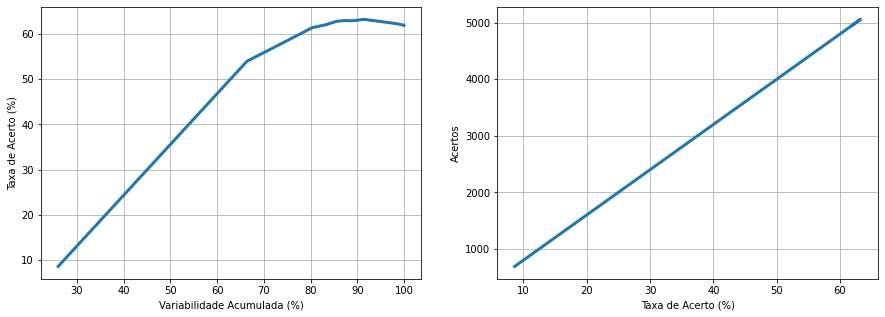

In [32]:
acertos = np.array(hit_vector)
erros = np.array(mistakes_vector)
taxaAcerto = np.array(hit_rate_vector)
variabilidadeAcumulada = np.array(accumulated_variability_vector)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(variabilidadeAcumulada,taxaAcerto,lw=3.0)
plt.grid()
plt.ylabel("Taxa de Acerto (%)")
plt.xlabel("Variabilidade Acumulada (%)")
plt.subplot(1,2,2)
plt.plot(taxaAcerto,acertos,lw=3.0)
plt.grid()
plt.ylabel("Acertos")
plt.xlabel("Taxa de Acerto (%)")
plt.show()